##Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


##Some basic statistics

In [ ]:
df.shape

(924, 8)

In [ ]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


##Ploting numerical features

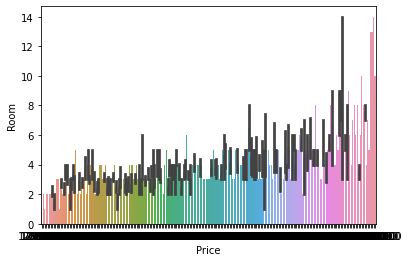

In [ ]:
sns.barplot(x= df.Price, y= df.Room)

We can see that price and number of rooms are sort of linked to each other but we were expecting a result like this

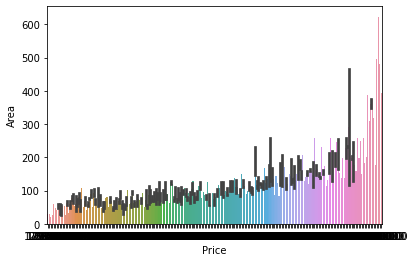

In [ ]:
sns.barplot(x= df.Price, y= df.Area)

Same as number of rooms, price increases as area increases

In [ ]:
sns.color_palette("coolwarm", as_cmap=True)

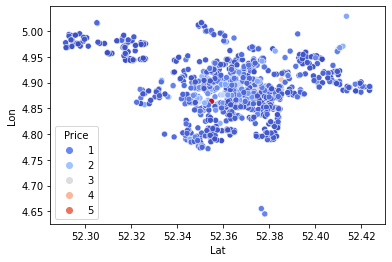

In [ ]:
sns.scatterplot(x=df.Lat, y= df.Lon, hue= df.Price, palette='coolwarm')

So as its shown on this graph, they are only few expensive houses this might mean they are considered outliers and we have to remove them for better final results

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='Lat', y= 'Lon', color='Price',
                 labels={
                     "Lat": "Latitude",
                     "Lon": "Lonitude"},
                 title='Location and Price of houses')
fig.show()

Using plotly's interactive scatterplots we have analyzed more deeply into the pricing 

In [ ]:
df.Room.unique()

array([ 3,  4,  6,  5,  2,  7,  1, 13,  8,  9, 10, 14, 12])

Checking the unique values in room feature 

<BarContainer object of 924 artists>

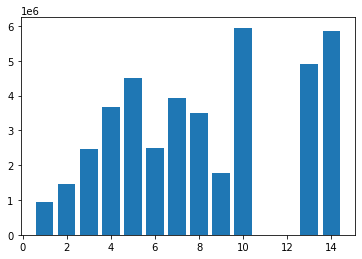

In [ ]:
plt.bar(x = df.Room, height = df.Price)


For some reason price of 10 room house is higher than price of 13 or 14 room houses could be because of the area we need to find out and there are some missing values we need to take care of

In [ ]:
df.Address.nunique()

919

In [ ]:
pip install missingno --quiet

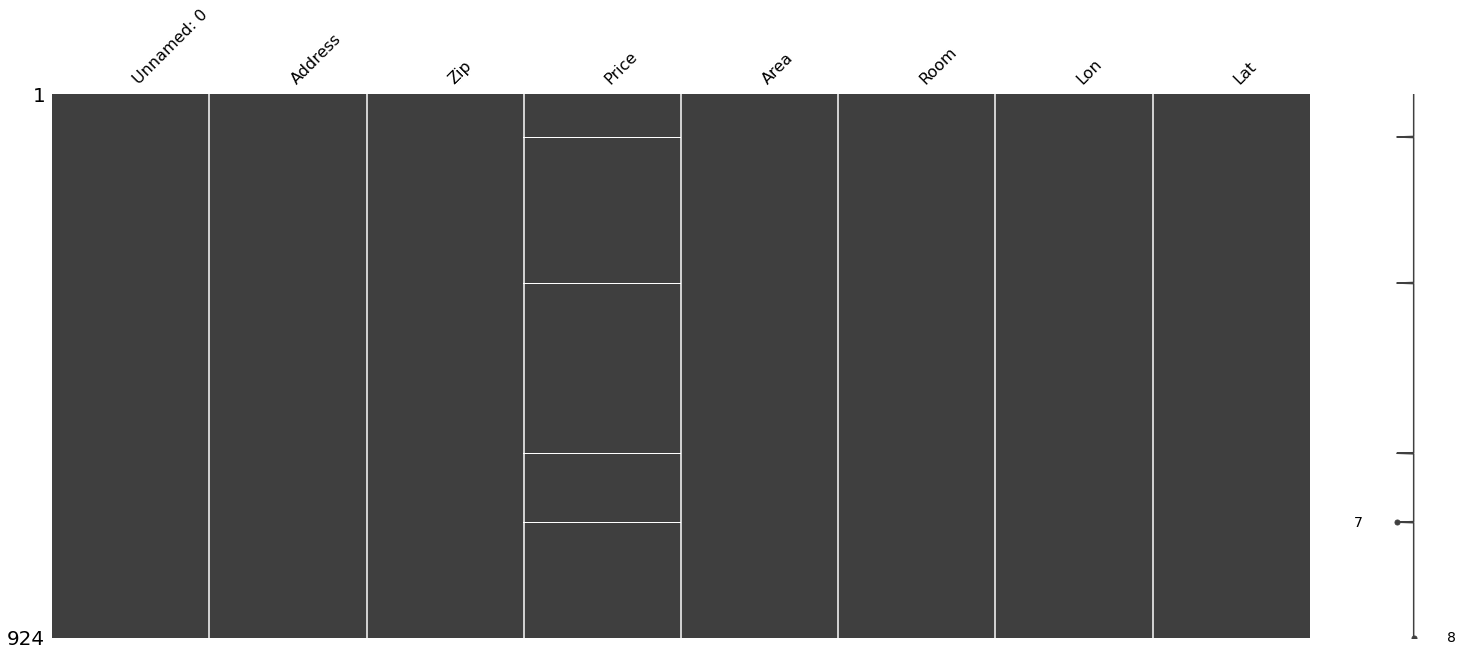

In [ ]:
import missingno as msno
msno.matrix(df)

there are about 4 missing values in price columns which is good we will replace them with mean value of price 

##filling the null values, treating outliers and changing to correct datatype

####null values

In [ ]:
df.Price = df.Price.fillna(df.Price.mean())

In [ ]:
df.Price = df.Price.round()
df.Price = df.Price.astype(int)

####outliers

In [ ]:
def detect_outliers(data):
  outliers = []
  threshold=3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    score = (i - mean)/std
    if np.abs(score) > threshold:
      outliers.append(i)
  return outliers
outlier_pt=detect_outliers(df.Price)

In [ ]:
outliers = pd.DataFrame(outliers)
outliers = outliers.astype(float)

In [ ]:
outlier_pt
outlier_pt = pd.DataFrame(outlier_pt)

In [ ]:
df = df[~df['Price'].isin(outlier_pt.stack())]

In [ ]:
df.drop(columns=['Address', 'Zip'], inplace = True)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace = True)

##Feature Selection

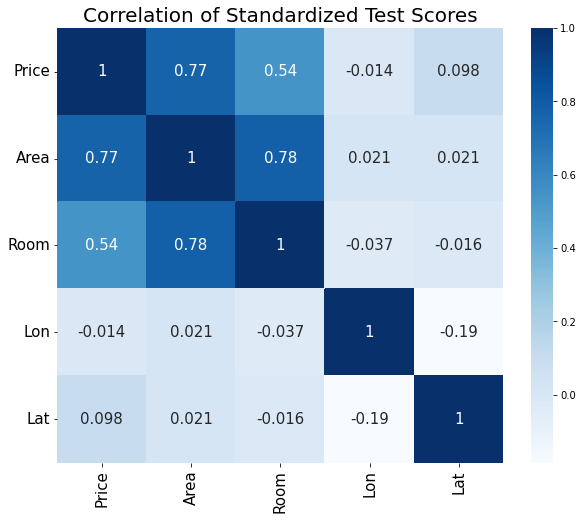

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, 
                 annot=True, 
                 annot_kws={'size':15}, 
                cmap='Blues')
ax.set_title("Correlation of Standardized Test Scores", fontsize=20)
ax.tick_params(axis="x", labelsize=15, labelrotation=90)
ax.tick_params(axis='y', labelsize=15, labelrotation=0)

So we can see that the location of houses dont really matter when it comes to prices so for that reason im gonna get rid of lat and lon features

In [ ]:
df.drop(columns=['Lat', 'Lon'], inplace = True)

In [ ]:
df

,Price,Area,Room
0,685000,64,3
1,475000,60,3
2,850000,109,4
3,580000,128,6
4,720000,138,5
...,...,...,...
919,750000,117,1
920,350000,72,3
921,350000,51,3
922,599000,113,4


##Predicting the target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(columns= 'Price')
y= df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Area,Room
85,32,1
10,69,3
632,101,4
256,81,3
494,62,2
...,...,...
108,53,2
279,203,5
877,64,2
451,69,4


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction = prediction.astype(int)

In [39]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 2))

Mean absolute error = 153317.03
Mean squared error = 46815800843.27
Median absolute error = 121764.5
Explain variance score = 0.63
R2 score = 0.63
